## Zomato data Analysis

Step 1 - importing liabraries



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 - importing dataset

In [13]:
df = pd.read_csv('/content/Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Step 3 - Data Cleaning and Preprocessing

In [14]:
# Remove '/5' from the 'rate' column and convert to float
df['rate'] = df['rate'].astype(str).str.replace('/5', '')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Quetions

1. Type of Restaurant

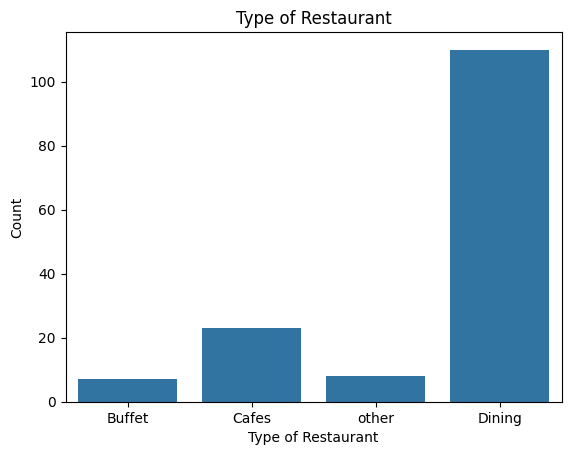

In [19]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.title('Type of Restaurant')
plt.show()


2. majority votes by restaurant type

Text(0.5, 1.0, 'Restaurant Types by Vote Count')

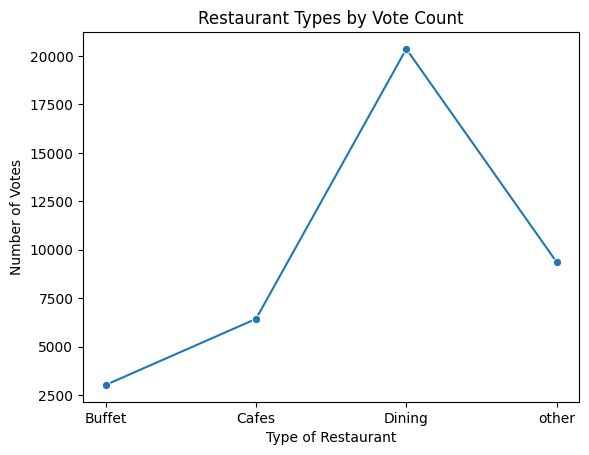

In [33]:
restaurant_votes = df.groupby('listed_in(type)')['votes'].sum().reset_index()

sns.lineplot(x='listed_in(type)', y='votes', data=restaurant_votes, marker='o')

plt.xlabel('Type of Restaurant')
plt.ylabel('Number of Votes')
plt.title('Restaurant Types by Vote Count')


3. majority restaurants recieved ratings


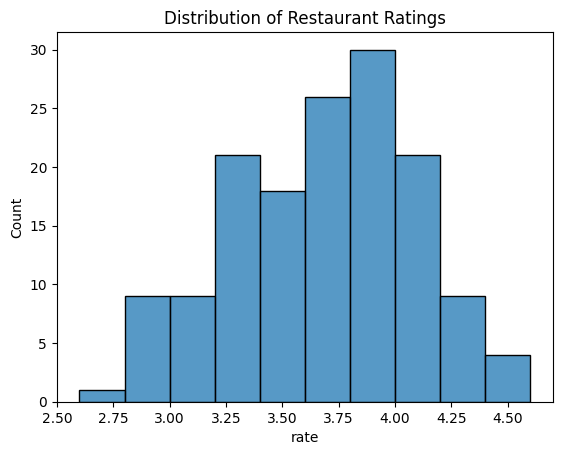

In [38]:
sns.histplot(df['rate'], bins=10)
plt.title('Distribution of Restaurant Ratings')
plt.show()


4. Average orders spending by couples


Text(0.5, 1.0, 'Distribution of Approximate Cost for Two People')

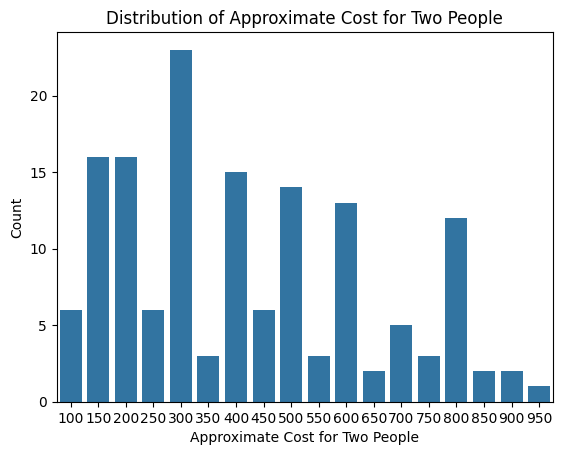

In [40]:
sns.countplot(x='approx_cost(for two people)', data=df)
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Count')
plt.title('Distribution of Approximate Cost for Two People')

5. which mode receives maximum rating

Text(0, 0.5, 'Rating')

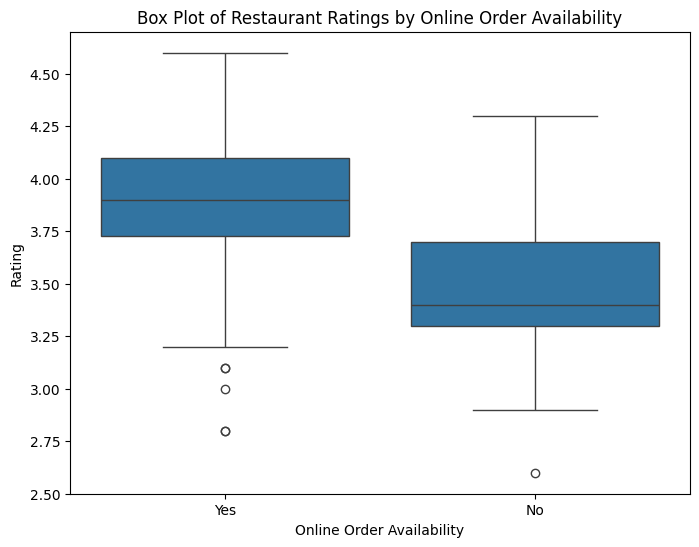

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Box Plot of Restaurant Ratings by Online Order Availability')
plt.xlabel('Online Order Availability')
plt.ylabel('Rating')

6.

Text(50.722222222222214, 0.5, 'Restaurant Type')

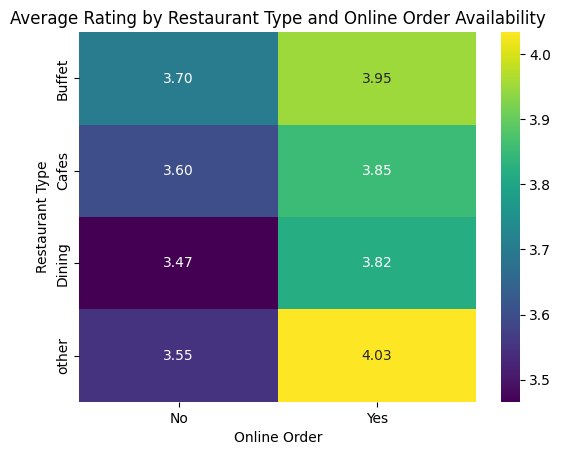

In [46]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', values='rate', aggfunc='mean')

sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Rating by Restaurant Type and Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')

# Conclusion

1. The majority of the restaurants fall into the dining category.

2. Dining restaurants are preferred by a larger number of individuals.

3. the majority of restaurants received rating ranging from 3.5 to 4.

4. The majority of couples prefer restaurants with an approximate cost of 300 rupees.

5. offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

6. Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. this suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.